In [1]:
import numpy as np
import pandas as pd
from read_data import read_data
from image import image_process
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
import re

In [2]:
X,y = read_data()

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


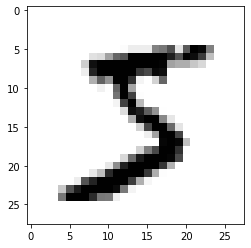

In [5]:
digits = X

img = image_process(digits)
img.show_image(0)


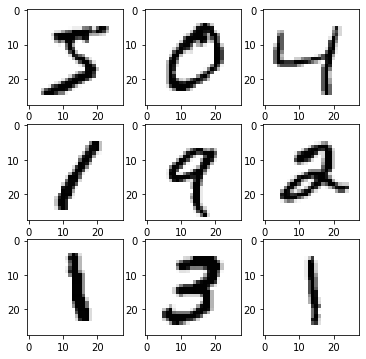

In [6]:
img = image_process(digits)
img.show_nine_image(0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# flatten the column vector y to 1-D array
y_train = np.ravel(y_train,order='c')
y_test = np.ravel(y_test, order='c')

In [8]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
32338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y_train

array([1, 9, 1, ..., 0, 7, 8])

In [10]:
print(X_train.shape, y_train.shape)

(49000, 784) (49000,)


In [11]:
reg = LogisticRegression(solver="liblinear")

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [12]:
# cross-validation for Logistic Regression
cv = cross_val_score(reg, X_train, y_train, cv = 5)
print(cv)
print(cv.mean()) # average accuracy from cross-validation is 91.57% using logistic regression

[0.91071429 0.91367347 0.91295918 0.92142857 0.91642857]
0.9150408163265306


In [13]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

array([1, 9, 1, ..., 0, 7, 8])

In [14]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9683333333333334


array([1, 9, 1, ..., 0, 7, 8])

In [15]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

knn_predict = knn.predict(X_test)

In [16]:
import time

def get_time():
    score = []
    execution_time = []
    models = [LogisticRegression(solver="liblinear"), MLPClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train)
        score.append(model.score(X_test, y_test))
        execution_time.append(time.time()-start_time)
        
    return np.round(score,4), np.round(execution_time,4)


In [17]:
# get_time()

**Confusion Matrix**
1. Visualize and compare the performance of Logistic Regression and KNN
2. KNN has a higher accuracy across all digits compared to Logistic Regression
3. Both models show inaccurary with predicting digits 2, 3, and 8

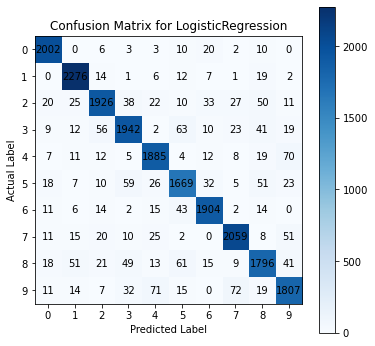

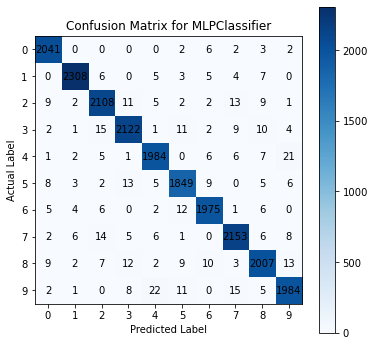

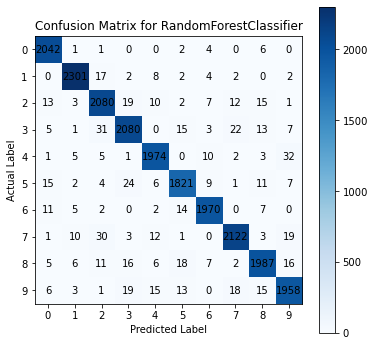

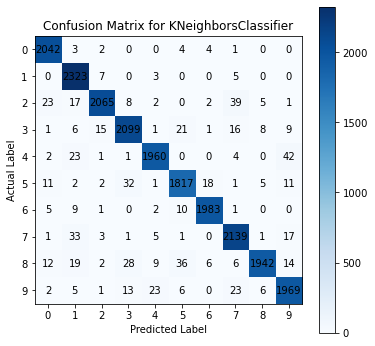

In [130]:
models = [reg, mlp, rf, knn]

for model in models:
    model_predict = model.predict(X_test)
    title = re.sub('\([^()]*\)', '', str(model))
    image_process.confusion_matrix(y_test, model_predict, title)



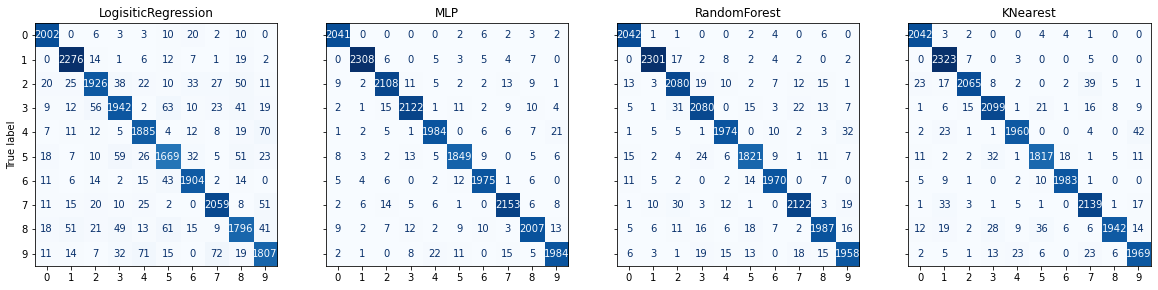

In [129]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "LogisiticRegression": reg,
    'MLP': mlp,
    'RandomForest': rf,
    "KNearest": knn
}

fig, axes = plt.subplots(1,4, sharex=True, sharey=True,figsize=(20,10))

for i, (key, classifier) in enumerate(models.items()):
    model_predict = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, model_predict)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    disp.ax_.set_title(key)
    disp.ax_.set_xlabel('')
    disp.im_.colorbar.remove()
    # plt.colorbar(disp.im_, ax=axes[i], fraction=0.046, pad=0.04)

    if i!=0:
        disp.ax_.set_ylabel('')
